# Task 1: Data Loading and Preprocessing

### 1. Loading the dataset from the given CSV file into a Pandas Data Frame

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#1: Loading the data into pandas data frame
df = pd.read_csv("../data/Dataset.csv")
df.head()

,Sno,job,education,gender,English speaker
0,1,manage,15,male,no
1,2,admin,16,male,no
2,3,admin,12,female,no
3,4,admin,8,female,no
4,5,admin,15,male,no


###  2. Basic data preprocessing steps, including handling missing values and removing duplicate rows.

In [62]:
#Dropping the Sno column as it is insignificant for our analysis
df.drop(['Sno'], axis=1, inplace=True)

In [63]:
#check dataset for the number of rows and columns
df.shape

(474, 4)

In [64]:
#unique values in each column
df['job'].unique()
df['education'].unique()
df['gender'].unique()
df['English speaker'].unique()

array(['no', 'yes'], dtype=object)

In [65]:
#identifying categorical and numerical columns inside the dataset
catagorical_cols = df.columns[(df.dtypes == "object").tolist()].tolist()
numerical_cols = df.columns[(df.dtypes != 'object').tolist()].tolist()

catagorical_cols
numerical_cols

['education']

In [66]:
#identifying the total missing values
missing_values = df.isnull().sum()
missing_values

job                0
education          0
gender             0
English speaker    0
dtype: int64

In [67]:
#Handling missing values by replacing them with mode value of that column
df['job'].fillna(df['job'].mode()[0], inplace = True)
df['education'].fillna(df['education'].mode()[0], inplace = True)
df['English speaker'].fillna(df['English speaker'].mode()[0], inplace = True)



In [68]:
#checking for duplicate rows
df.duplicated().sum()

#Removing duplicate rows
df.drop_duplicates(inplace = True)

### 3. Display the first few rows of the cleaned dataset.

In [69]:
#Displaying the first 10 rows of the cleaned dataset
df.head(10)

,job,education,gender,English speaker
0,manage,15,male,no
1,admin,16,male,no
2,admin,12,female,no
3,admin,8,female,no
4,admin,15,male,no
8,admin,15,female,no
10,admin,16,female,no
11,admin,8,male,yes
12,admin,15,male,yes
13,admin,15,female,yes


# Task 2: Exploratory Data Analysis

### 1. Visualizing data to show distributions  of job roles, education levels, gender, and English-speaking status.

In [70]:
#Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 445
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job              40 non-null     object
 1   education        40 non-null     int64 
 2   gender           40 non-null     object
 3   English speaker  40 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [71]:
#Checking the tendencies of data
df.describe(include = 'all')

,job,education,gender,English speaker
count,40,40.000000,40,40
unique,3,NaN,2,2
top,admin,NaN,male,no
freq,23,NaN,30,22
mean,NaN,14.550000,NaN,NaN
std,NaN,3.615848,NaN,NaN
min,NaN,8.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN
50%,NaN,15.000000,NaN,NaN
75%,NaN,17.000000,NaN,NaN


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

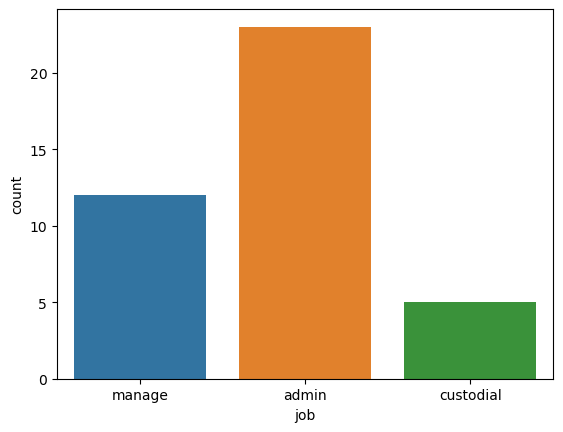

In [96]:
#pie chart to Compare the job role distribution
sns.countplot(df['job'])


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

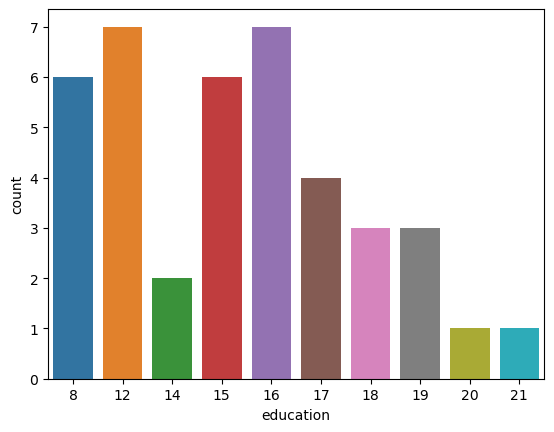

In [97]:
#Displaing the count for each education level
sns.countplot(df['education'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

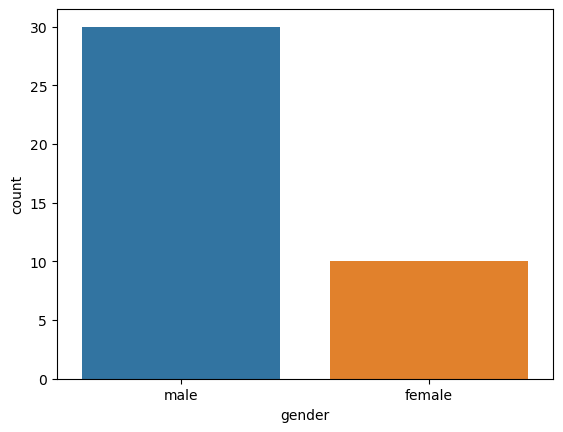

In [103]:
#Gender distribution of the dataset
sns.countplot(df['gender'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='English speaker', ylabel='count'>

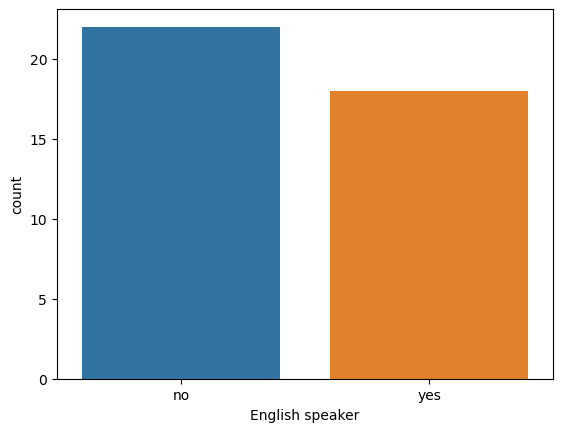

In [102]:
#English speaker distribution of the dataset
sns.countplot(df['English speaker'])

### 2. Calculate the percentage of individuals belonging to different job roles, education levels, genders, and English-speaking groups.


In [107]:
#Calculating percentage of individuals belonging to each job role
df['job'].value_counts(normalize=True) * 100


admin        57.5
manage       30.0
custodial    12.5
Name: job, dtype: float64

In [110]:
#Calculating percentage of individuals belonging to each education level
df['education'].value_counts(normalize=True) * 100

16    17.5
12    17.5
15    15.0
8     15.0
17    10.0
19     7.5
18     7.5
14     5.0
20     2.5
21     2.5
Name: education, dtype: float64

In [111]:
#Calculating the percentage of individuals belonging to each gender group
df['gender'].value_counts(normalize=True) * 100

male      75.0
female    25.0
Name: gender, dtype: float64

In [112]:
# Calculating the percentage of english speakers and non english speakers
df['English speaker'].value_counts(normalize=True) * 100

no     55.0
yes    45.0
Name: English speaker, dtype: float64